[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 0.0419
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0025
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0022
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0024
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0021
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0021
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0017
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0015
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0016
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0013
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0013
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0013
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0013
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0012
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0022
Epoch 16/50
62

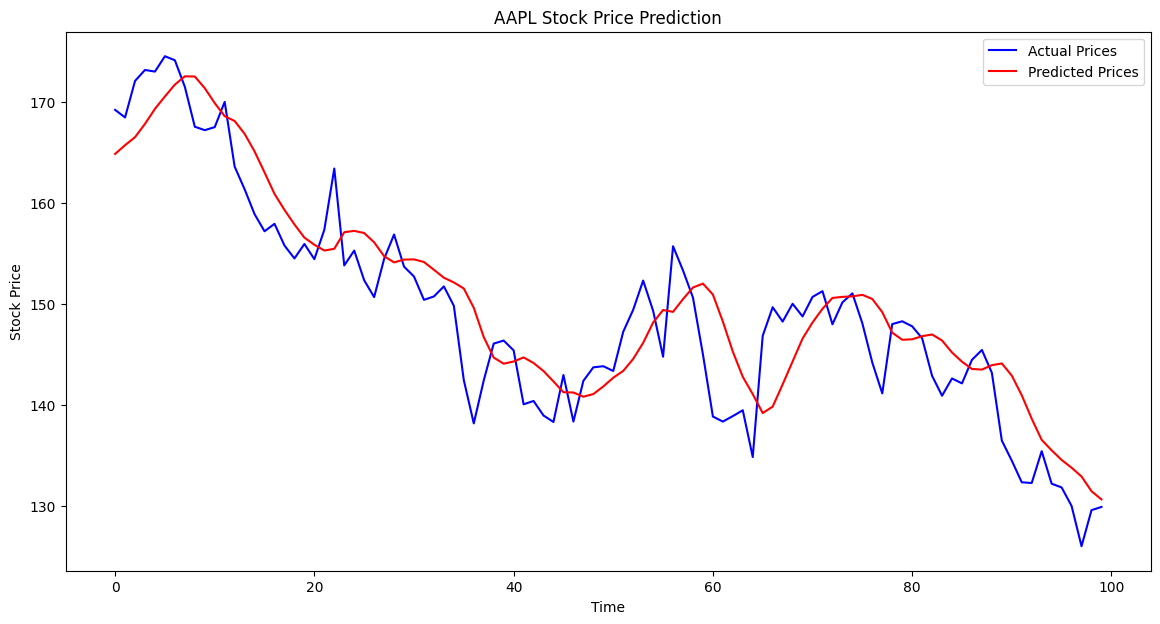

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Fetch and preprocess the stock market data
# Fetch historical stock price data
ticker = "AAPL" # Replace with your desired stock symbol
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
prices = data["Close"].values.reshape(-1, 1)
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)
# Prepare training data
sequence_length = 60 # Use the last 60 days to predict the next day's price
x_train, y_train = [], []
for i in range(sequence_length, len(scaled_data)):
 x_train.append(scaled_data[i-sequence_length:i, 0])
 y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Reshape for LSTM
input
# Step 2: Build the LSTM model
model = Sequential([
 LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
 Dropout(0.2),
 LSTM(50, return_sequences=False),
 Dropout(0.2),
 Dense(25),
 Dense(1)
])
# Step 3: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Step 4: Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)
# Step 5: Test the model
# Create test data
test_data = scaled_data[len(scaled_data) - sequence_length - 100:] # Last 100 days for testing
x_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
 x_test.append(test_data[i-sequence_length:i, 0])
 y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get model predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) # Inverse scaling
# Step 6: Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(data["Close"].values[-len(y_test):], color="blue", label="Actual Prices")
plt.plot(predicted_prices, color="red", label="Predicted Prices")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()